### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python



<div style="height:80px;"></div> 

## Planning My Analytic Approach

# NHS Data Analysis: 

## Objective:
Provide insights into whether the NHS has sufficient capacity to meet demand and how resources are being utilised, while also exploring the causes and impacts of missed appointments.

## Approach:
- Utilisation Trends: Analyse appointment volumes over time, by service type and consultation mode, to identify growth and seasonal demand patterns.
- Capacity Indicators: Use consultation length and waiting times between booking and appointment as proxies for staff and infrastructure pressure.
- Missed Appointments: Quantify missed appointments, highlight regional or service‑specific trends, and estimate the financial and social impact.
- External Signals: Review trending healthcare topics on Twitter to assess whether social sentiment can inform NHS demand forecasting.

## Key Findings 
- Missed appointments create adittional costs for the NHS.
- Lowering the rate of missed appointments would deliver both financial savings and social benefits.
- The reasons for missed appointments need to be better understood, rather than penalised.

## Expected Outcomes:
- A clear picture of NHS demand and capacity over the reporting period.
- Identification of seasonal peaks and regional pressure points.
- Actionable strategies to reduce missed appointments and related costs.
- Evaluation of how social media insights can support proactive NHS planning.

## Benefit:
- Deliver evidence‑based recommendations to support NHS leadership in making informed budgeting and capacity decisions while improving patient care efficiency.


> ***Check*** that you have adequately satisfied the expectations of the current module and that you have added code comments as well as Markdown cells documenting your analytic journey and observations to satisfy the assessment criteria.

<div style="height:80px;"></div> 

## 2) Importing and exploring data
**Basic exploration and descriptive statistics.**
- Import the three indicated data sources and perform basic exploratory analysis including obtaining descriptive statistics.
- Determine and comment on the quality, usefulness, and opportunities contained in the data sets.
- Document initial observations and findings.

Are there any comments regarding data quality or descriptive statistics worth noting for each of the data sets?
Can you comment on other features (columns) that could potentially be useful in your analysis?

### Prepare your workstation

In [217]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [219]:
# Import and sense-check the actual_duration.csv dataset as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
ad.head(6)

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730
5,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,11-15 Minutes,1073


In [221]:
# Check for missing values.
ad.isnull().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [223]:
# Review the descriptive statistics of the dataset.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [225]:
# Review the metadata of the dataset.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [227]:
# Import and sense-check 'appointments_regional.csv' as ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
ar.head(6)

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
5,E54000034,2020-01,Attended,GP,Face-to-Face,More than 28 Days,3273


In [229]:
# Check for missing values.
ar.isnull().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [231]:
# Review the descriptive statistics of the dataset.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [21]:
# Review the metadata of the dataset.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [22]:
# Check for duplicate values and display result
ar.duplicated().sum()

21604

In [23]:
# Clean ar dataset from duplicate values.
ar_clean = ar.drop_duplicates()

# Check the numbers of rows and columns in the new clean ar dataset.
ar_clean.shape

(575217, 7)

In [24]:
# Import and sense-check 'national_categories.xlsx' as nc.
nc = pd.read_excel('national_categories.xlsx')

In [25]:
# View the DataFrame.
nc.head(6)

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
5,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Care Home Visit,11,2021-08


In [26]:
# Check for missing values.
nc.isnull().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

In [27]:
# Review the descriptive statistics of the dataset.
nc.describe()

,appointment_date,count_of_appointments
count,817394,817394.000000
mean,2022-01-16 00:50:35.860796160,362.183684
min,2021-08-01 00:00:00,1.000000
25%,2021-10-25 00:00:00,7.000000
50%,2022-01-18 00:00:00,25.000000
75%,2022-04-07 00:00:00,128.000000
max,2022-06-30 00:00:00,16590.000000
std,NaN,1084.576600


In [28]:
# Review the metadata of the dataset.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


### Exploration:
Make sure to supplement the list with additional questions and observations that you have identified during modules 1 and 2.

**Question 1:** How many locations are there in the data set?

In [31]:
# Determine the number of locations.
# The data includes three geographic levels (Region, ICB, and Sub‑ICB), which we must verify are aligned across all files.

# Looking at the regional level, which only ad lists.
print('Data on number of regions:')
print('ad lists', ad['region_ons_code'].value_counts().count(), 'regions')

# Looking at the ICB level.
print('Data on number of ICB locations:')
print('ad lists', ad['icb_ons_code'].value_counts().count(), 'ICB codes')
print('nc lists', nc['icb_ons_code'].value_counts().count(), 'ICB codes')
print('ar lists', ar['icb_ons_code'].value_counts().count(), 'ICB codes')

# Looking at the Sub-ICB level.
print('Data on number of Sub-ICB locations:')
print('ad lists', ad['sub_icb_location_code'].value_counts().count(), 'Sub ICB location codes')
print('ad lists', ad['sub_icb_location_ons_code'].value_counts().count(), 'Sub ICB ONS location codes')
print('ad lists', ad['sub_icb_location_name'].value_counts().count(), 'Sub ICB ONS location names')
print('nc lists', nc['sub_icb_location_name'].value_counts().count(), 'Sub ICB ONS location names')

Data on number of regions:
ad lists 7 regions
Data on number of ICB locations:
ad lists 42 ICB codes
nc lists 42 ICB codes
ar lists 42 ICB codes
Data on number of Sub-ICB locations:
ad lists 106 Sub ICB location codes
ad lists 106 Sub ICB ONS location codes
ad lists 106 Sub ICB ONS location names
nc lists 106 Sub ICB ONS location names


**Question 2:** What are the five locations with the highest number of records?



In [33]:
# Determine the top five locations based on record count.
# I will handle this by pulling the required information and storing it in a new DataFrame.

# Defining new DataFrame. This will initially be defined as a series however.
loc_rec_count = ad['sub_icb_location_name'].value_counts()

# Converting the series to a dataframe.
loc_rec_count = loc_rec_count.reset_index()

# Adding columns.
loc_rec_count.columns = ['Location Name', 'Record Count']

# For certainty, I have sorted the values by record count.
loc_rec_count.sort_values('Record Count', ascending=False)

# We can then print the top five (or any other number)
# Define how many locations we want to see as 'x'.
x = 5
print('The', x, 'locations with highest number of records are:', loc_rec_count['Location Name'].head(x).tolist())

# Show the head of the DataFrame regardless.
loc_rec_count.head()

The 5 locations with highest number of records are: ['NHS Norfolk and Waveney ICB - 26A', 'NHS Kent and Medway ICB - 91Q', 'NHS North West London ICB - W2U3Z', 'NHS Bedfordshire Luton and Milton Keynes ICB - M1J4Y', 'NHS Greater Manchester ICB - 14L']


,Location Name,Record Count
0,NHS Norfolk and Waveney ICB - 26A,1484
1,NHS Kent and Medway ICB - 91Q,1484
2,NHS North West London ICB - W2U3Z,1484
3,NHS Bedfordshire Luton and Milton Keynes ICB -...,1484
4,NHS Greater Manchester ICB - 14L,1484


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [35]:
# Determine the number of service settings.
nc_ss = nc['service_setting'].value_counts()
print('Count of service settings:', nc_ss.size)

Count of service settings: 5


In [36]:
# Determine the number of context types.
nc_ct = nc['context_type'].value_counts()
print('Count of context types:', nc_ct.size)

Count of context types: 3


In [37]:
# Determine the number of national categories.
nc_nc = nc['national_category'].value_counts()
print('Count of national categories:', nc_nc.size)

Count of national categories: 18


In [38]:
# Determine the number of appointment statuses.
ar_as = ar['appointment_status'].value_counts()
print('Count of appointment statuses:', ar_as.size)

Count of appointment statuses: 3


> ***Check*** that you have adequately satisfied the expectations of the current module and that you have added code comments as well as Markdown cells documenting your analytic journey and observations to satisfy the assessment criteria.

# 

## 3) Continuing to explore the data and search for answers to more specific questions posed by the NHS.


**Question 1:** Between what dates were appointments scheduled? 

In [44]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad['appointment_date'].head(6)

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
5    01-Dec-21
Name: appointment_date, dtype: object

In [45]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc['appointment_date'].head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [46]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the DateFrame.
print(ad.dtypes)
ad.head()

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [47]:
# Change the format of ar['appointment_date'] to datetime.
# I believe the statement above was meant to reference nc['appointment_date'].

nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# View the DateFrame.
print(nc.dtypes)
nc.head()

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [48]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.

max_ad_date = ad[['appointment_date']].max()
min_ad_date = ad[['appointment_date']].min()

# max/min_ad_date returns as a Series. The '.to_string(index=False)' code reduces it to just the date in question.
print(f"The oldest recorded appointment was on {min_ad_date.to_string(index=False)}.")
print(f"The most recently recorded appointment was on {max_ad_date.to_string(index=False)}.")

The oldest recorded appointment was on 2021-12-01.
The most recently recorded appointment was on 2022-06-30.


In [49]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.

max_ad_date = nc[['appointment_date']].max()
min_ad_date = nc[['appointment_date']].min()

# max/min_ad_date returns as a Series. The '.to_string(index=False)' code reduces it to just the date in question.
print(f"The oldest recorded appointment was on {min_ad_date.to_string(index=False)}.")
print(f"The most recently recorded appointment was on {max_ad_date.to_string(index=False)}.")

The oldest recorded appointment was on 2021-08-01.
The most recently recorded appointment was on 2022-06-30.


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [51]:
# For each of these service settings, determine the number of records available for the period and the location. 

# Filter for NHS North West London ICB - W2U3Z
nc_subset = nc[nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z']

# Filter date range between Jan 2022 and June 2022
nc_subset_daterange = nc_subset[
    (nc_subset['appointment_date'] >= '2022-01-01') & 
    (nc_subset['appointment_date'] <= '2022-06-01')
]

# Sum count_of_appointments per service setting
nc_subset_daterange.groupby('service_setting')['count_of_appointments'].sum()

service_setting
Extended Access Provision      98159
General Practice             4804239
Other                         152897
Primary Care Network          109840
Unmapped                      391106
Name: count_of_appointments, dtype: int64

**Question 3:** Which month had the highest number of appointments?

In [53]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.

# Sum number of appointments per month
appt_per_month = (
    nc.groupby('appointment_month')['count_of_appointments']
    .sum()
    .sort_values(ascending=False)
)

# Display result 
appt_per_month

appointment_month
2021-11    30405070
2021-10    30303834
2022-03    29595038
2021-09    28522501
2022-05    27495508
2022-06    25828078
2022-01    25635474
2022-02    25355260
2021-12    25140776
2022-04    23913060
2021-08    23852171
Name: count_of_appointments, dtype: int64

**Question 4:** What was the total number of records per month?

In [55]:
# Total number of records per month.
# --- Total number of appointments per month by data source ---

# Format appointment_date in ad to match month format
ad['appointment_month'] = ad['appointment_date'].dt.strftime('%Y-%m')

# Group and sum count_of_appointments per month for each data source
nc_apptmonth_sum = nc.groupby('appointment_month')['count_of_appointments'].sum().rename('nc_appointments')
ar_apptmonth_sum = ar.groupby('appointment_month')['count_of_appointments'].sum().rename('ar_appointments')
ad_apptmonth_sum = ad.groupby('appointment_month')['count_of_appointments'].sum().rename('ad_appointments')

# Combine results into a single table
all_rec_appts = pd.concat([nc_apptmonth_sum, ar_apptmonth_sum, ad_apptmonth_sum], axis=1)

# Sort by month
all_rec_appts = all_rec_appts.sort_index()

# Display results
all_rec_appts

,nc_appointments,ar_appointments,ad_appointments
appointment_month,,,
2020-01,NaN,27199296,NaN
2020-02,NaN,24104621,NaN
2020-03,NaN,24053468,NaN
2020-04,NaN,16007881,NaN
2020-05,NaN,16417212,NaN
2020-06,NaN,20690805,NaN
2020-07,NaN,22491437,NaN
2020-08,NaN,20150520,NaN
2020-09,NaN,26714255,NaN


In [56]:
# Your additional questions and insights.

Overall appointments rise in the winter months, experience a slowdown from December to February, and increase again in March.

> ***Check*** that you have adequately satisfied the expectations of the current module and that you have added code comments as well as Markdown cells documenting your analytic journey and observations to satisfy the assessment criteria.

# 

## 4) Create visualisations and identify possible monthly and seasonal trends in the data.

In [62]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [64]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month'] = nc['appointment_month'].astype(str)
nc.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

In [65]:
# Aggregate on a monthly level and determine the sum of records per month.
nc_recs = nc.groupby('appointment_month').sum(numeric_only=True).reset_index()

# View the output
nc_recs

,appointment_month,count_of_appointments
0,2021-08,23852171
1,2021-09,28522501
2,2021-10,30303834
3,2021-11,30405070
4,2021-12,25140776
5,2022-01,25635474
6,2022-02,25355260
7,2022-03,29595038
8,2022-04,23913060
9,2022-05,27495508


**Service settings:**

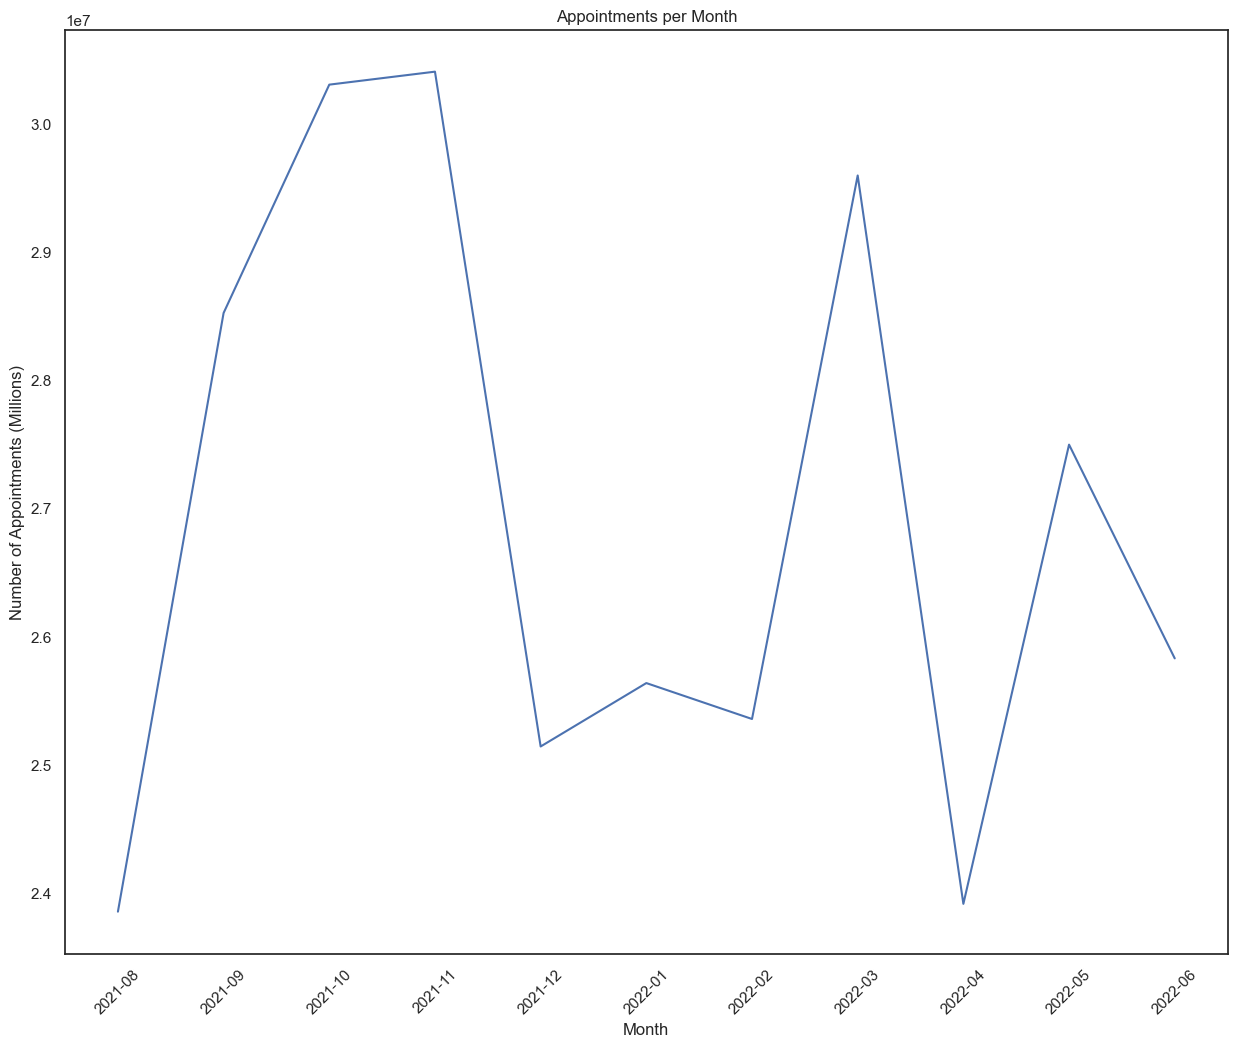

In [67]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.

# Plot the appointments over time
sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments', 
    data=nc_recs,
    ci=None
)

# Add title and axis labels
plt.title('Appointments per Month')
plt.xlabel('Month')
plt.ylabel('Number of Appointments (Millions)')

# Rotate x-axis labels if needed for readability
plt.xticks(rotation=45)

plt.show()

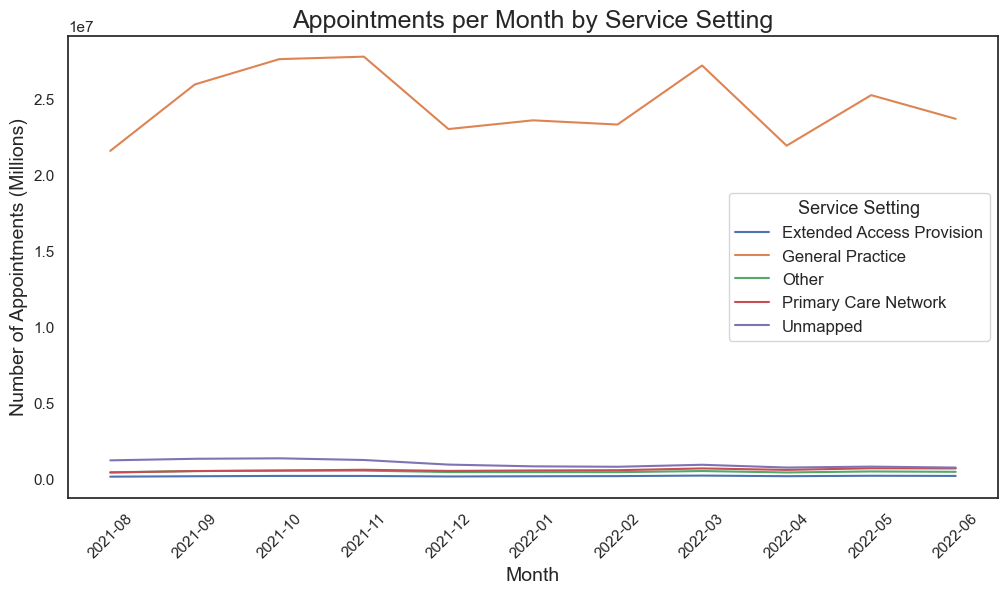

In [68]:
# Breaking down the analysis by service setting.
# Creating a new DataFrame grouping the appointment month and service setting.
nc_ss = (
    nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index())

# Creating a lineplot with service setting as hue
plt.figure(figsize=(12,6))
sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments', 
    hue='service_setting', 
    data=nc_ss, 
    ci=None
)

# Formatting
plt.title('Appointments per Month by Service Setting', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Appointments (Millions)', fontsize=14)
plt.xticks(rotation=45)  # Rotate dates for readability
plt.legend(title='Service Setting', fontsize=12, title_fontsize=13)

# Saving the figure
plt.savefig('appointments_per_month_by_service_setting.png', dpi=300, bbox_inches='tight')

plt.show()


**Context types:**

In [70]:
# Create a dataset grouped by appointment_month and context_type
nc_ct = (
    nc.groupby(['appointment_month', 'context_type'])['count_of_appointments']
    .sum()
    .reset_index()
)

# View the output.
nc_ct.head(6)

,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135
5,2021-09,Unmapped,1336115


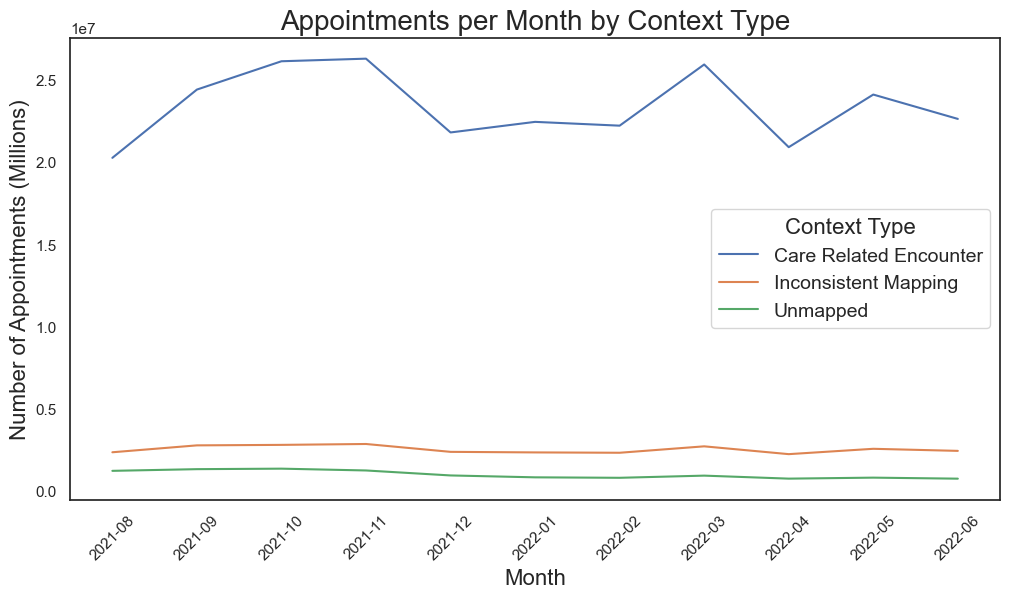

In [71]:
# Plot the appointments over the available date range, and review the context types for months.

# Creating the lineplot
plt.figure(figsize=(12,6))
sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments', 
    hue='context_type', 
    data=nc_ct, 
    ci=None
)

# Formatting
plt.title('Appointments per Month by Context Type', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Appointments (Millions)', fontsize=16)
plt.xticks(rotation=45)  # rotate x-axis labels for readability
plt.legend(title='Context Type', fontsize=14, title_fontsize=16)

# Saving the figure
plt.savefig('appointments_per_month_by_context_type.png', dpi=300, bbox_inches='tight')

plt.show()


**National categories:**

In [73]:
# Create a separate data set that can be used in future weeks. 
nc_nc = (
    nc.groupby(['appointment_month', 'national_category'])['count_of_appointments']
    .sum()
    .reset_index()
)

# View the output
nc_nc.head(21)

,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045
5,2021-08,Group Consultation and Group Education,5161
6,2021-08,Home Visit,165061
7,2021-08,Inconsistent Mapping,2363093
8,2021-08,Non-contractual chargeable work,10775
9,2021-08,Patient contact during Care Home Round,31316


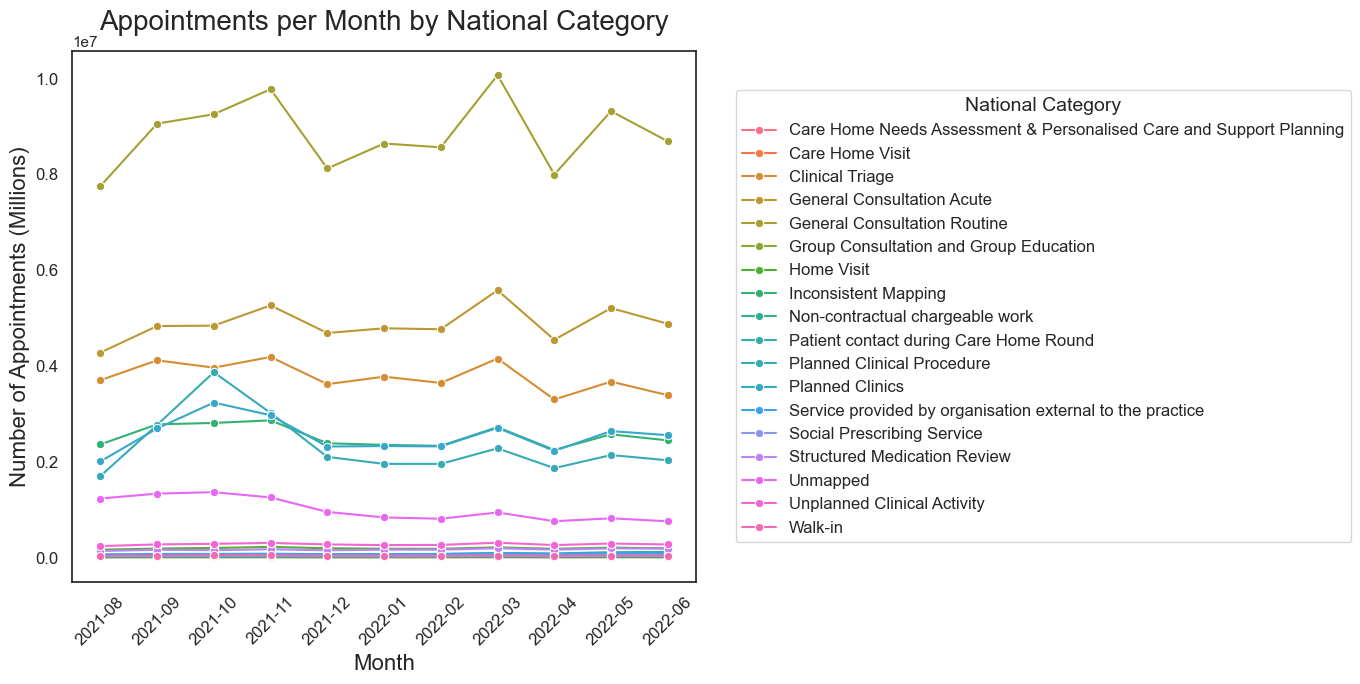

In [74]:
# Set a larger figure size
plt.figure(figsize=(14,7))

# Create a lineplot with markers for clarity
sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments', 
    hue='national_category', 
    data=nc_nc,
    ci=None,
    marker="o"  # adds dots at each month
)

# Titles and axis labels
plt.title('Appointments per Month by National Category', fontsize=20, pad=15)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Appointments (Millions)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside the plot, increase font size
plt.legend(
    title='National Category',
    fontsize=12,
    title_fontsize=14,
    bbox_to_anchor=(1.05, 0.5),
    loc='center left'
)

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the figure
plt.savefig('appointments_per_month_by_national_category.png', dpi=300, bbox_inches='tight')

plt.show()

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season.

**Summer:**


In [77]:
# Create a separate data set that can be used in future weeks. 

# Filter the dataset to include only the summer months (June through August 2021).
nc_sum = nc[(nc['appointment_month']>= '2021-06') &\
           (nc['appointment_month']<='2021-08')]

# Group the summer data by appointment date and service setting,
# summing only the appointment counts.
nc_ss_day = (
    nc_sum.groupby(['appointment_date', 'service_setting'])['count_of_appointments']
    .sum()
    .reset_index()
)

# View the size of the resulting dataset and the first few rows.
print(nc_ss_day.shape)
nc_ss_day.head()

(155, 3)


,appointment_date,service_setting,count_of_appointments
0,2021-08-01,Extended Access Provision,438
1,2021-08-01,General Practice,3411
2,2021-08-01,Other,401
3,2021-08-01,Primary Care Network,323
4,2021-08-01,Unmapped,1054


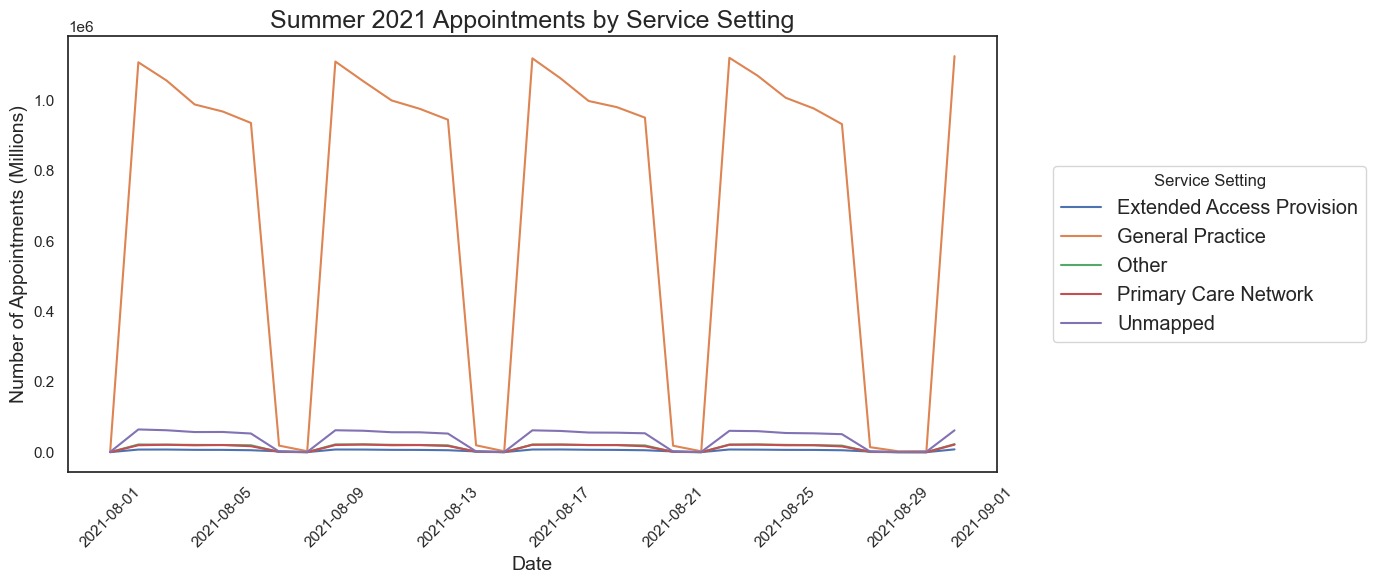

In [78]:
# Ensure appointment_month is datetime
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'])

# Filter for Summer 2021 (June to August 2021)
nc_sum = nc[(nc['appointment_month'] >= '2021-06-01') &
            (nc['appointment_month'] <= '2021-08-31')]

# Group the summer data
nc_ss_day = (
    nc_sum.groupby(['appointment_date', 'service_setting'])['count_of_appointments']
    .sum()
    .reset_index()
)

# Plot the summer subset
plt.figure(figsize=(14,6))
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_ss_day, ci=None)

plt.title('Summer 2021 Appointments by Service Setting', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Appointments (Millions)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Service Setting', fontsize='large', bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout()
plt.show()


**Autumn:**

In [80]:
# Create a separate data set that can be used in future weeks. 
# Filtering the dataset to include only the autumn months (September through November 2021).
nc_aut = nc[(nc['appointment_month'] >= '2021-09') &
            (nc['appointment_month'] <= '2021-11')]

# Grouping the autumn data by appointment date and service setting,
# summing only the appointment counts.
nc_ss_day = (
    nc_aut.groupby(['appointment_date', 'service_setting'])['count_of_appointments']
    .sum()
    .reset_index()
)

# View the size of the resulting dataset and the first few rows.
print(nc_ss_day.shape)
nc_ss_day.head()

(455, 3)


,appointment_date,service_setting,count_of_appointments
0,2021-09-01,Extended Access Provision,6916
1,2021-09-01,General Practice,1041879
2,2021-09-01,Other,21796
3,2021-09-01,Primary Care Network,21371
4,2021-09-01,Unmapped,57423


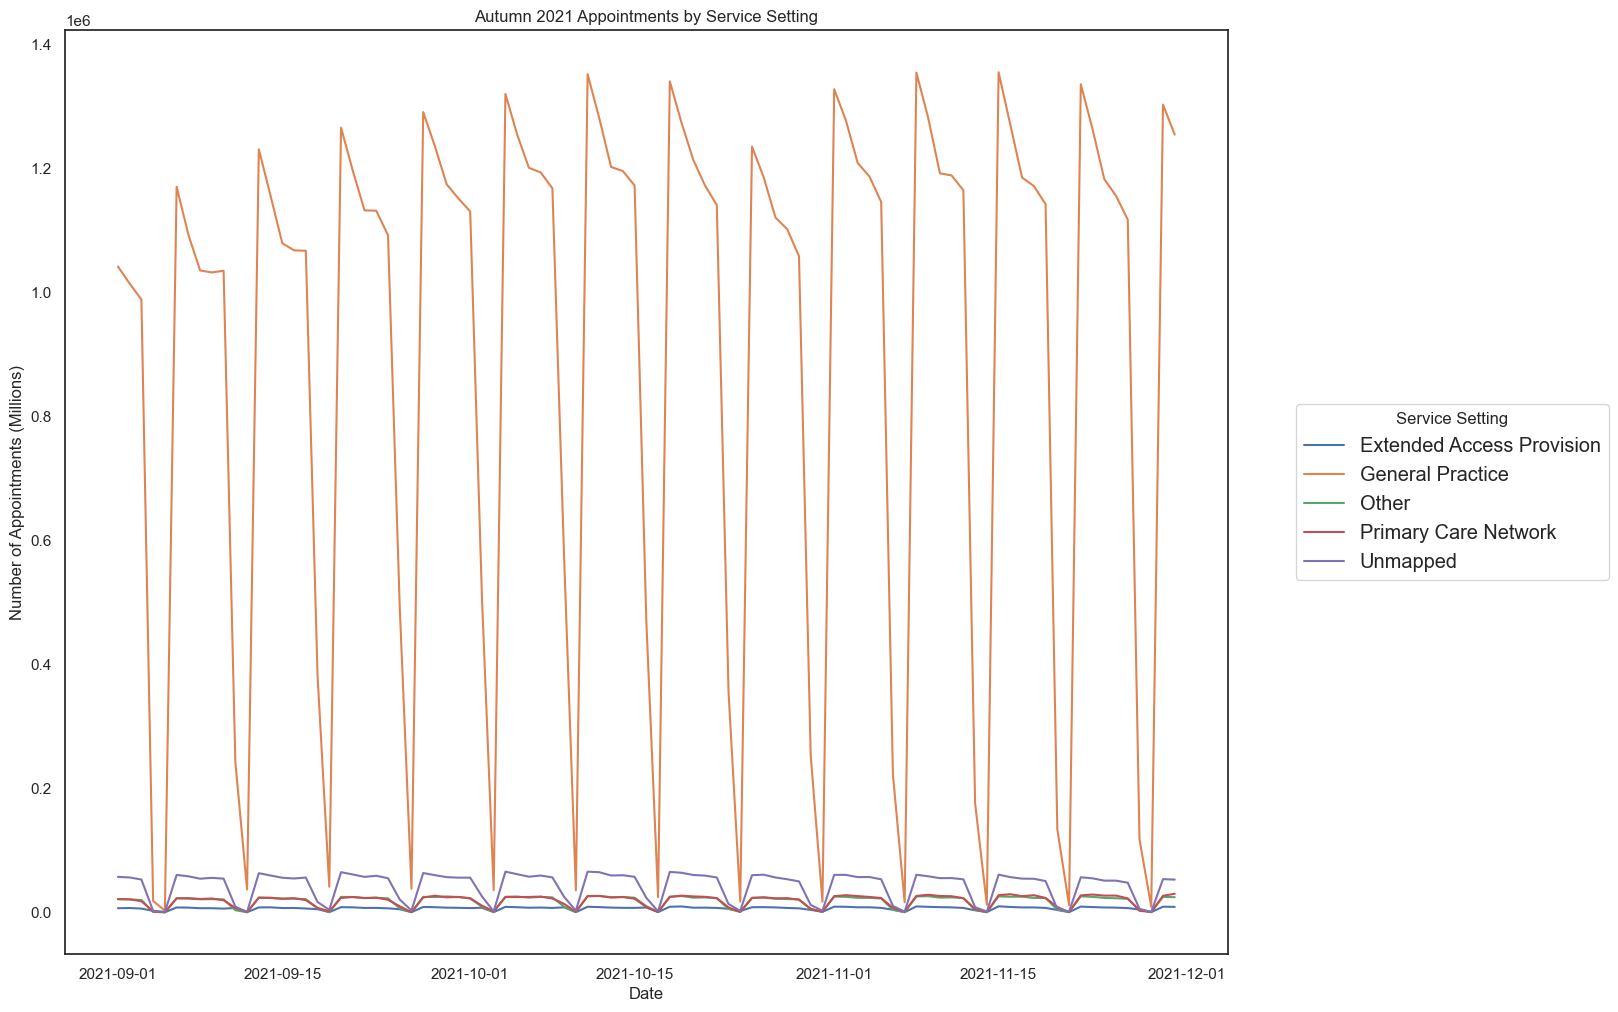

In [81]:
# Visualise the subset using a lineplot.

sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_ss_day, ci=None )

# Adding a title and changing the axis names to be more relatable.
plt.title('Autumn 2021 Appointments by Service Setting')
plt.xlabel('Date')
plt.ylabel('Number of Appointments (Millions)')

# Adjusting the size of the legend.
plt.legend( title='Service Setting',  fontsize='large', bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.show()

**Winter:**

In [83]:
# Create a separate data set that can be used in future weeks. 
# Filter the dataset to include only the winter months (December 2021 through February 2022).
nc_win = nc[(nc['appointment_month'] >= '2021-12-01') &
            (nc['appointment_month'] <= '2022-02-28')]

# Group the winter data by appointment date and service setting,
# summing only the appointment counts.
nc_ss_day = (
    nc_win.groupby(['appointment_date', 'service_setting'])['count_of_appointments']
    .sum()
    .reset_index()
)

# View the size of the resulting dataset and the first few rows.
print(nc_ss_day.shape)
nc_ss_day.head()

(450, 3)


,appointment_date,service_setting,count_of_appointments
0,2021-12-01,Extended Access Provision,8500
1,2021-12-01,General Practice,1162676
2,2021-12-01,Other,22924
3,2021-12-01,Primary Care Network,26887
4,2021-12-01,Unmapped,49064


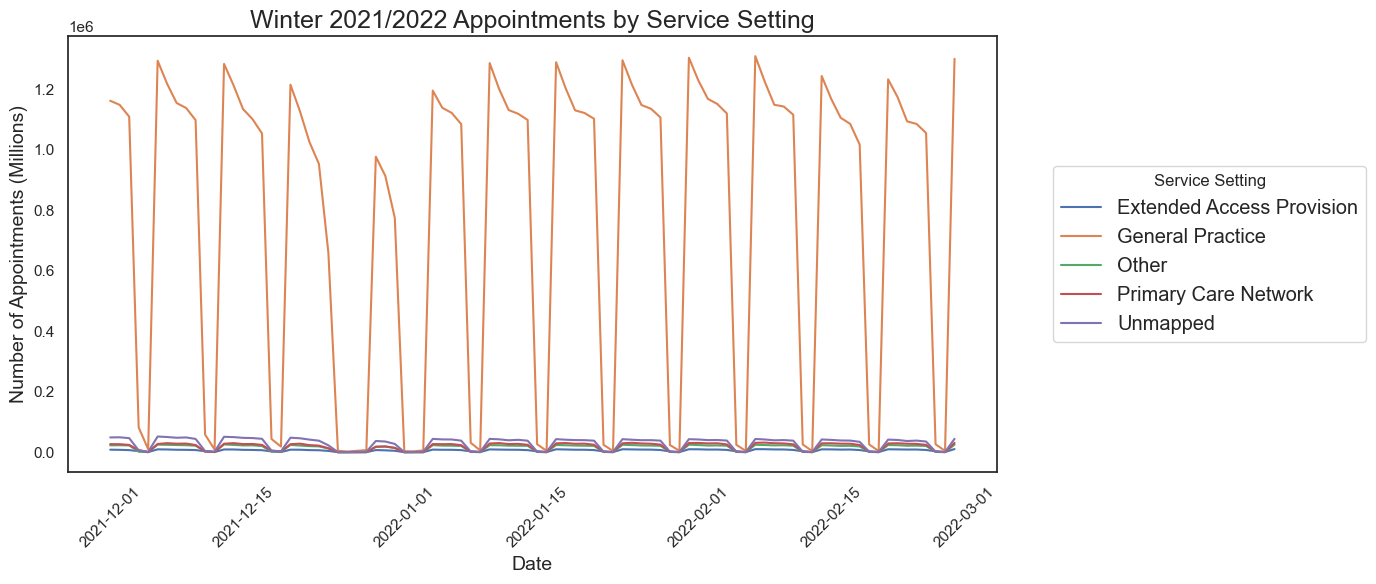

In [84]:
# Visualise the subset using a lineplot.
plt.figure(figsize=(14,6))
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_ss_day, ci=None)

# Adding a title and changing the axis names to be more relatable.
plt.title('Winter 2021/2022 Appointments by Service Setting', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Appointments (Millions)', fontsize=14)
plt.xticks(rotation=45)

# Adjusting the size and position of the legend
plt.legend(title='Service Setting', fontsize='large', bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout()
plt.show()

**Spring:**

In [86]:
# Create a separate data set that can be used in future weeks. 
# Filtering the dataset to include only the spring months (March through May 2022).
nc_spr = nc[(nc['appointment_month'] >= '2022-03') &
            (nc['appointment_month'] <= '2022-05')]

# Grouping the spring data by appointment date and service setting,
# summing only the appointment counts.
nc_ss_day = (
    nc_spr.groupby(['appointment_date', 'service_setting'])['count_of_appointments']
    .sum()
    .reset_index()
)

# View the size of the resulting dataset and the first few rows.
print(nc_ss_day.shape)
nc_ss_day.head()


(460, 3)


,appointment_date,service_setting,count_of_appointments
0,2022-03-01,Extended Access Provision,10082
1,2022-03-01,General Practice,1229045
2,2022-03-01,Other,23986
3,2022-03-01,Primary Care Network,32070
4,2022-03-01,Unmapped,42682


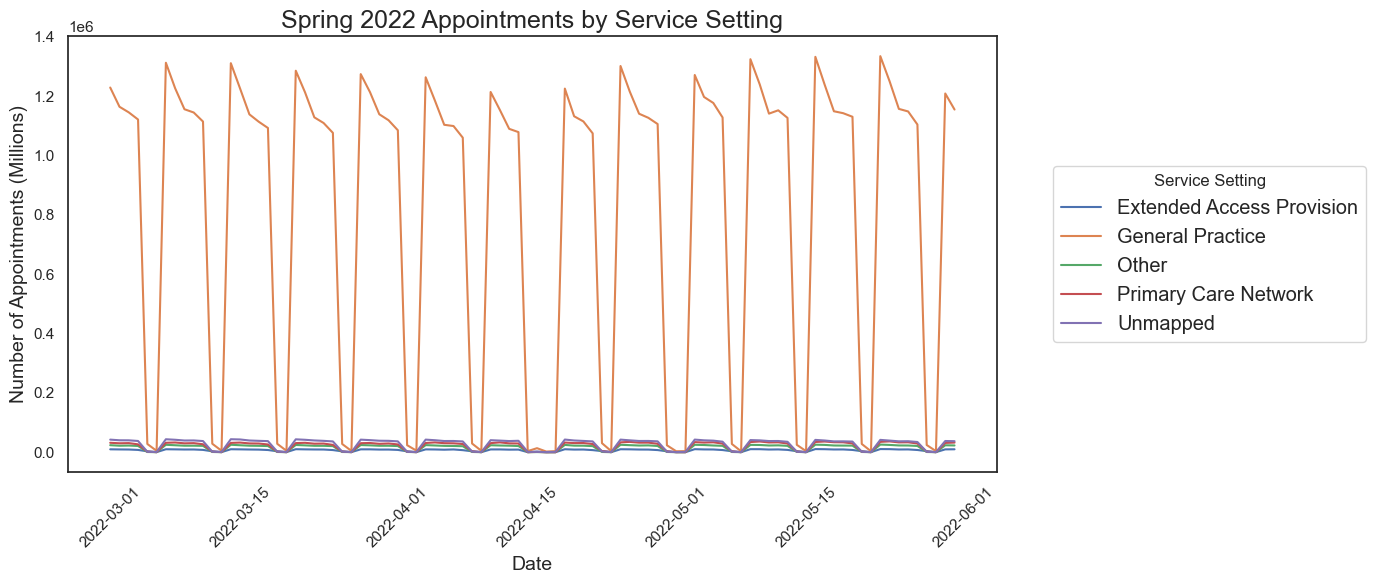

In [87]:
# Visualise the subset using a lineplot.
plt.figure(figsize=(14,6))
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_ss_day, ci=None)

# Adding a title and changing the axis names to be more relatable.
plt.title('Spring 2022 Appointments by Service Setting', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Appointments (Millions)', fontsize=14)
plt.xticks(rotation=45)

# Adjusting the size of the legend.
plt.legend(title='Service Setting', fontsize='large', bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout()
plt.show()

> ***Check*** that you have adequately satisfied the expectations of the current module and that you have added code comments as well as Markdown cells documenting your analytic journey and observations to satisfy the assessment criteria.

# 

## 5) Analysing tweets from Twitter with hashtags related to healthcare in the UK.

In [92]:
# Libraries and settings needed for analysis.
import pandas as pd
import seaborn as sns

# Set the figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display.
pd.options.display.max_colwidth = 200

In [93]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [94]:
# Explore the metadata and data set.
tweets.shape, tweets.info(), tweets.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


((1174, 10),
 None,
            tweet_id  tweet_retweet_count  tweet_favorite_count
 count  1.174000e+03          1174.000000            1174.00000
 mean   1.567612e+18             8.629472               0.37138
 std    2.427553e+13            29.784675               2.04470
 min    1.567574e+18             0.000000               0.00000
 25%    1.567590e+18             0.000000               0.00000
 50%    1.567611e+18             1.000000               0.00000
 75%    1.567633e+18             3.000000               0.00000
 max    1.567655e+18           303.000000              42.00000)

In [95]:
# Would it be useful to only look at retweeted and favourite tweet messages?
retweet_data = tweets['tweet_retweet_count'].value_counts().reset_index()
retweet_data.columns = ['Retweet_Count', 'Frequency']


favourite_data = tweets['tweet_favorite_count'].value_counts().reset_index()
favourite_data.columns = ['Favourite_Count', 'Frequency']


print(retweet_data.sort_values(by='Retweet_Count', ascending=False))
print(favourite_data.sort_values(by='Favourite_Count', ascending=False))

# Explain your answer.
# Looking at retweet and favourite counts alone is not particularly insightful,
# as they simply show how much engagement certain tweets received.
# For these metrics to provide meaningful value, the dataset should be filtered
# to include only tweets relevant to the UK, England, or the NHS.
# Once filtered, the most popular tweets could be analyzed to identify recurring themes or concerns.

    Retweet_Count  Frequency
42            303          1
12            208         12
25            207          3
46            169          1
19            150          4
36            107          1
22             85          3
38             79          1
27             78          2
21             76          3
9              73         14
30             72          2
26             68          3
20             63          4
24             62          3
43             57          1
45             54          1
17             53          5
33             49          1
34             48          1
18             44          4
23             41          3
44             40          1
40             39          1
14             37          6
13             35         10
29             24          2
28             23          2
39             20          1
41             19          1
31             16          2
35             15          1
37             14          1
32            

In [96]:
# Create a new DataFrame containing only the text.
tweets_text = tweets[['tweet_full_text', 'tweet_entities_hashtags']]
tweets_text= tweets_text[['tweet_full_text', 'tweet_entities_hashtags']]

# View the DataFrame.
tweets_text.head(6)

,tweet_full_text,tweet_entities_hashtags
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...",#Healthcare
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"#PremiseHealth, #hiring"
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,#Healthcare
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,#NEW
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare"
5,"Nursing interventions can be independent, dependent, or collaborative.\n-----\nLearn more: 👉 https://t.co/jrGQeqDme4\n.\n#firstcoastcna #cnaexam #cnaexampreparation #jacksonville #cnatraining #nur...","#firstcoastcna, #cnaexam, #cnaexampreparation, #jacksonville, #cnatraining, #nurse, #nursing, #nurselife, #nursepractitioner, #nurseproblems, #nursingschool, #healthcare"


In [97]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = []

for y in [x.split(' ') for x in tweets_text['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Changing it to lowercase.
            tags.append(z.lower())

In [98]:
# Create a new series to count the values in the list.
tags_series = pd.Series(tags)
tags_series_values = tags_series.value_counts()

# Display the first 30 records.
tags[:30]

['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '🚨#new:🚨',
 'look!\n\n#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '🚨#new:🚨',
 '#disparities.',
 '@karahartnett\n#healthcare',
 '#alert',
 '#insurance',
 '#data\nhttps://t.co/h9hlamr7p9',
 '#healthcare']

In [99]:
# Convert the series to a DataFrame in preparation for visualisation.
tags_data = pd.DataFrame(tags_series_values).reset_index()

# Rename the columns.
tags_data.rename(columns={tags_data.columns[0]: "word", tags_data.columns[1]: "count"}, inplace=True)
print(tags_data)

               word  count
0       #healthcare    716
1           #health     80
2         #medicine     41
3               #ai     40
4              #job     38
...             ...    ...
1749      #evestudy      1
1750  #patientdata…      1
1751        #secure      1
1752           #sms      1
1753       \n#csjmu      1

[1754 rows x 2 columns]


In [100]:
# Fix the count datatype.
tags_data.dtypes
tags_data['count'].astype(int)

# View the result.
print(tags_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    1754 non-null   object
 1   count   1754 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.5+ KB
None


In [101]:
# Display records where the count is larger than 10.
tags_data_over10 = tags_data[(tags_data['count'] > 10)]
print(tags_data_over10)

                           word  count
0                   #healthcare    716
1                       #health     80
2                     #medicine     41
3                           #ai     40
4                          #job     38
5                      #medical     35
6                     #strategy     30
7               #pharmaceutical     28
8                #digitalhealth     25
9                       #pharma     25
10                   #marketing     25
11                  #medtwitter     24
12                     #biotech     24
13     #competitiveintelligence     24
14                       #meded     23
15                     #vaccine     18
16                      #hiring     18
17                        #news     17
18             #machinelearning     17
19                  #technology     17
20                 #coronavirus     16
21             #womeninmedicine     16
22                       #covid     16
23        #competitivemarketing     16
24                    #we

[Text(0.5, 1.0, 'Popularity of Hashtags')]

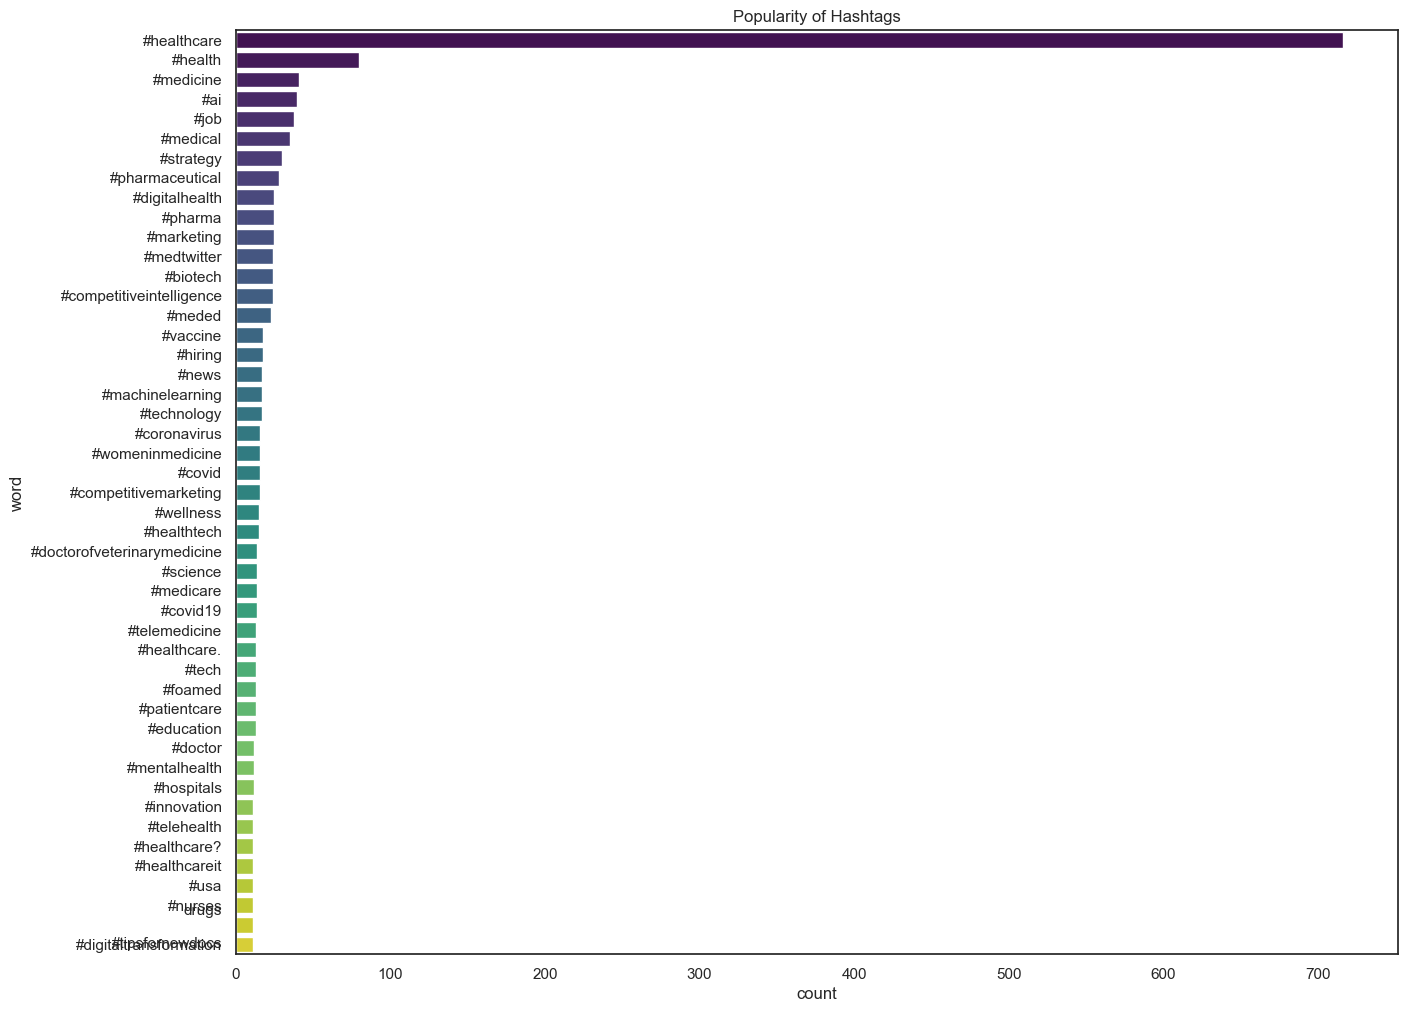

In [102]:
# Create a Seaborn barplot displaying records with a count larger than 10.
sns.barplot(x="count", y="word", hue="word", data=tags_data_over10, palette="viridis").set(title="Popularity of Hashtags")

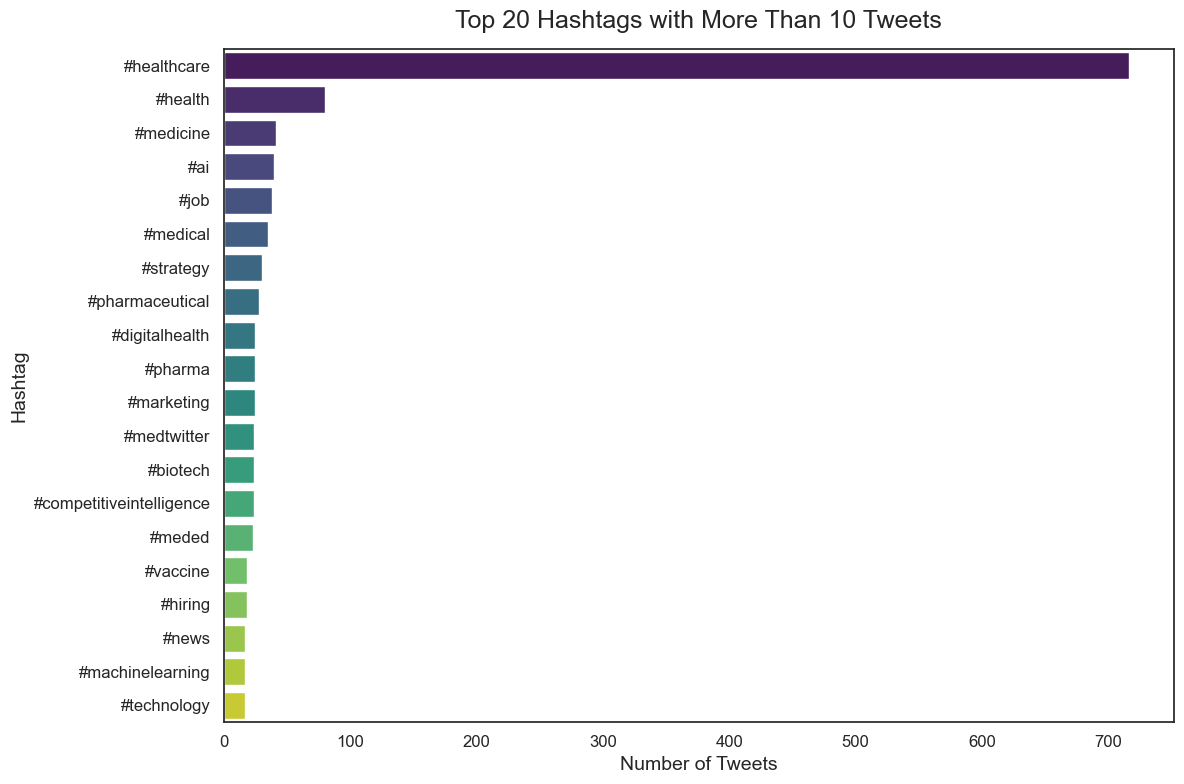

In [103]:
#Filter hashtags with count > 10
tags_data_over10 = tags_data[tags_data['count'] > 10]

#Select the top 20 hashtags for clarity
tags_data_clean = tags_data_over10.nlargest(20, 'count')

#Plot
plt.figure(figsize=(12,8))
sns.barplot(x="count", y="word", hue="word", data=tags_data_clean, palette="viridis")

plt.title("Top 20 Hashtags with More Than 10 Tweets", fontsize=18, pad=15)
plt.xlabel("Number of Tweets", fontsize=14)
plt.ylabel("Hashtag", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Most Popular Hashtags (Excluding Healthcare)')]

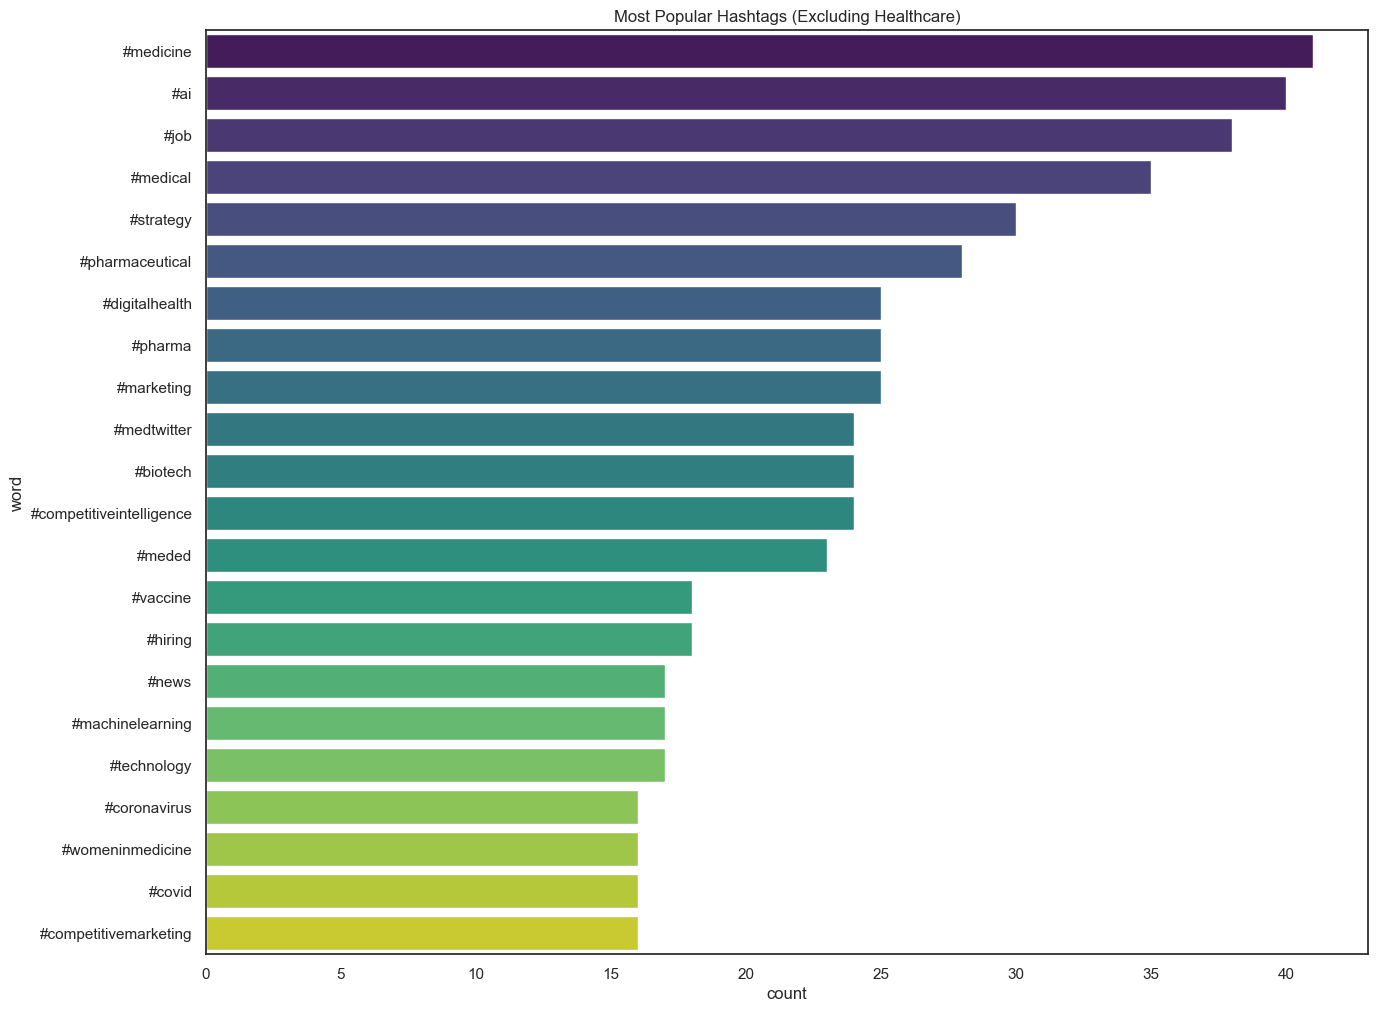

In [104]:
# Create the plot.
tags_nohealthcare = tags_data[(tags_data['count'] > 15) & (tags_data['count'] < 50)]

# View the barplot.
sns.barplot(x="count", y="word", hue="word", data=tags_nohealthcare, 
            palette="viridis").set(title="Most Popular Hashtags (Excluding Healthcare)")

 > ***Check*** that you have adequately satisfied the expectations of the current module and that you have added code comments as well as Markdown cells documenting your analytic journey and observations to satisfy the assessment criteria.

# 

## 6) Investigate the main concerns posed by the NHS. 

In [109]:
# Prepare your workstation.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the appointments_regional.csv file.
ar = pd.read_csv('appointments_regional.csv')

# Making sure the data is clean
print('Number of missing values:', ar.isnull().sum())
print('Number of duplicate values:', ar.duplicated().sum())


Number of missing values: icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64
Number of duplicate values: 21604


In [110]:
# Getting rid of the duplicate values
ar_clean2 = ar.drop_duplicates()
print('Number of missing values:', ar_clean2.isnull().sum())
print('Number of duplicate values:', ar_clean2.duplicated().sum())

# View the cleaned DataFrame.
ar_clean2

Number of missing values: icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64
Number of duplicate values: 0


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596813,E54000050,2022-06,Unknown,Unknown,Telephone,Same Day,10
596815,E54000050,2022-06,Unknown,Unknown,Unknown,15 to 21 Days,13
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28


In [111]:
# Print the min and max dates.
print('The first month is:', ar_clean2.appointment_month.min())
print('The final month is:', ar_clean2.appointment_month.max())

The first month is: 2020-01
The final month is: 2022-06


In [112]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_filtered = ar_clean2[ar_clean2['appointment_month'] >= '2021-08']

# View the data
ar_filtered

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...,...
596813,E54000050,2022-06,Unknown,Unknown,Telephone,Same Day,10
596815,E54000050,2022-06,Unknown,Unknown,Unknown,15 to 21 Days,13
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [114]:
# Create an aggregated data set to review the different features.
ar_aggre = ar_filtered.groupby(['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode',
                                   'time_between_book_and_appointment']
                                   )['count_of_appointments'].sum().reset_index()

# View the DataFrame.
ar_aggre

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08,GP,Attended,Face-to-Face,1 Day,507835
1,2021-08,GP,Attended,Face-to-Face,15 to 21 Days,194726
2,2021-08,GP,Attended,Face-to-Face,2 to 7 Days,959486
3,2021-08,GP,Attended,Face-to-Face,22 to 28 Days,102111
4,2021-08,GP,Attended,Face-to-Face,8 to 14 Days,398772
...,...,...,...,...,...,...
3749,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,5493
3750,2022-06,Unknown,Unknown,Unknown,More than 28 Days,5075
3751,2022-06,Unknown,Unknown,Unknown,Same Day,1889
3752,2022-06,Unknown,Unknown,Unknown,Unknown / Data Quality,51


In [115]:
# Determine the total number of appointments per month
ar_df = (ar_aggre.groupby('appointment_month').agg({'count_of_appointments':'sum'}).reset_index())

# Add the NHS benchmark for capacity
ar_df['budgeted_utilisation'] = 1_200_000

# Calculate the average utilisation per day (monthly total / 30 days)
ar_df['utilisation'] = (ar_df['count_of_appointments'] / 30).round(1)

# Add a percentage column to show utilisation compared to NHS benchmark
ar_df['utilisation_pct'] = ((ar_df['utilisation'] / ar_df['budgeted_utilisation']) * 100).round(1)

# View the DataFrame
ar_df

,appointment_month,count_of_appointments,budgeted_utilisation,utilisation,utilisation_pct
0,2021-08,23843177,1200000,794772.6,66.2
1,2021-09,28514685,1200000,950489.5,79.2
2,2021-10,30296850,1200000,1009895.0,84.2
3,2021-11,30395923,1200000,1013197.4,84.4
4,2021-12,25132174,1200000,837739.1,69.8
5,2022-01,25623928,1200000,854130.9,71.2
6,2022-02,25344812,1200000,844827.1,70.4
7,2022-03,29586020,1200000,986200.7,82.2
8,2022-04,23904960,1200000,796832.0,66.4
9,2022-05,27478652,1200000,915955.1,76.3


Text(0, 0.5, 'Number of Appointments (Millions)')

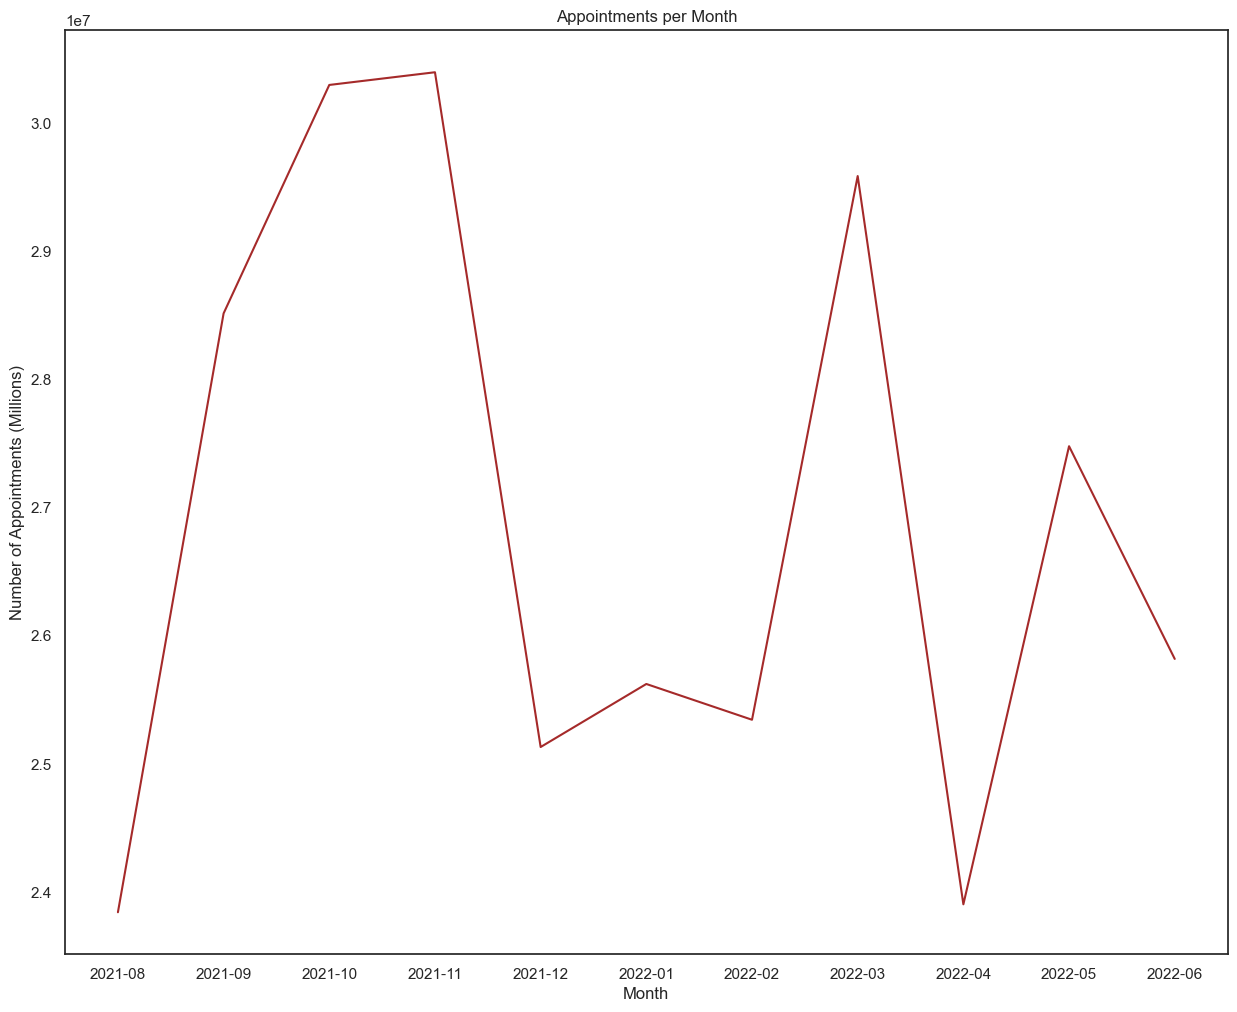

In [116]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
ar_df['appointment_month'] = ar_df['appointment_month'].astype(str)

# Create a lineplot with Seaborn.

sns.lineplot(x='appointment_month', y='count_of_appointments', data = ar_df, errorbar=None, color='brown')

# Adding a title and update axis labels for clarity.
plt.title('Appointments per Month')
plt.xlabel('Month')
plt.ylabel('Number of Appointments (Millions)')

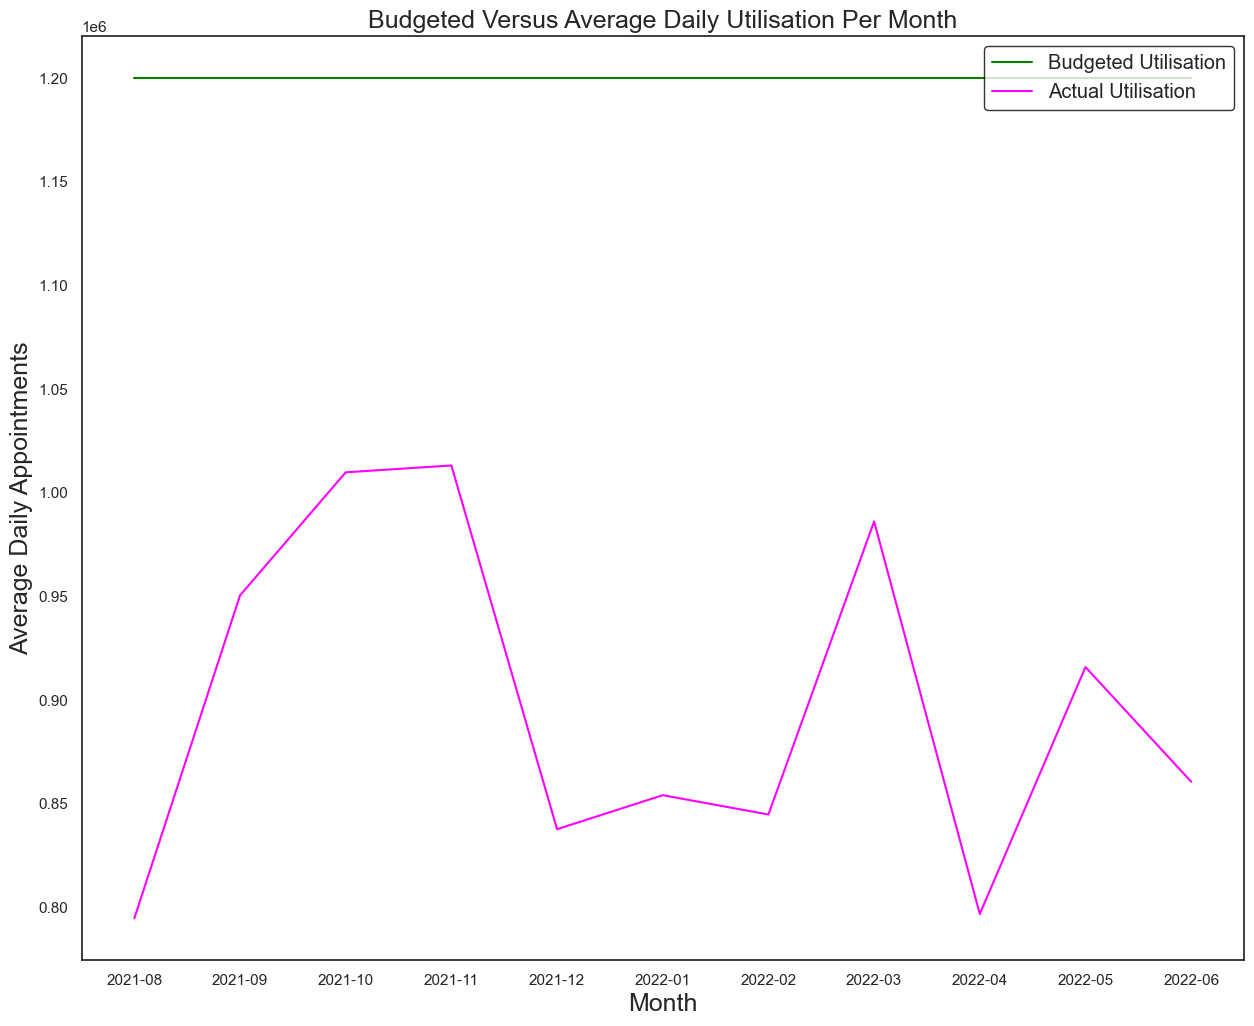

In [117]:
# Plot monthly capacity utilisation.
# This plot illustrates actual utilisation in relation to budgeted utilisation.

sns.lineplot(x='appointment_month', y='budgeted_utilisation', color='green', data = ar_df, label = 'Budgeted Utilisation', errorbar=None)
sns.lineplot(x='appointment_month', y='utilisation', color='magenta', data = ar_df, label='Actual Utilisation', errorbar=None)

# Adding a title and update axis labels for clarity.
plt.title('Budgeted Versus Average Daily Utilisation Per Month', size=18)
plt.xlabel('Month', size=18)
plt.ylabel('Average Daily Appointments', size =18)
plt.legend(
    fontsize='large',
    loc='upper right',     # location
    frameon=True,         # show legend box
    facecolor='white',    # white background
    edgecolor='black'     # black border
)

# Saving the figure. 
plt.savefig('Budgeted Versus Average Daily Utilisation Per Month', dpi=300, bbox_inches='tight')

**Question 2:** How do the healthcare professional types differ over time?

Text(0, 0.5, 'No. of Appointments (Ten Millions)')

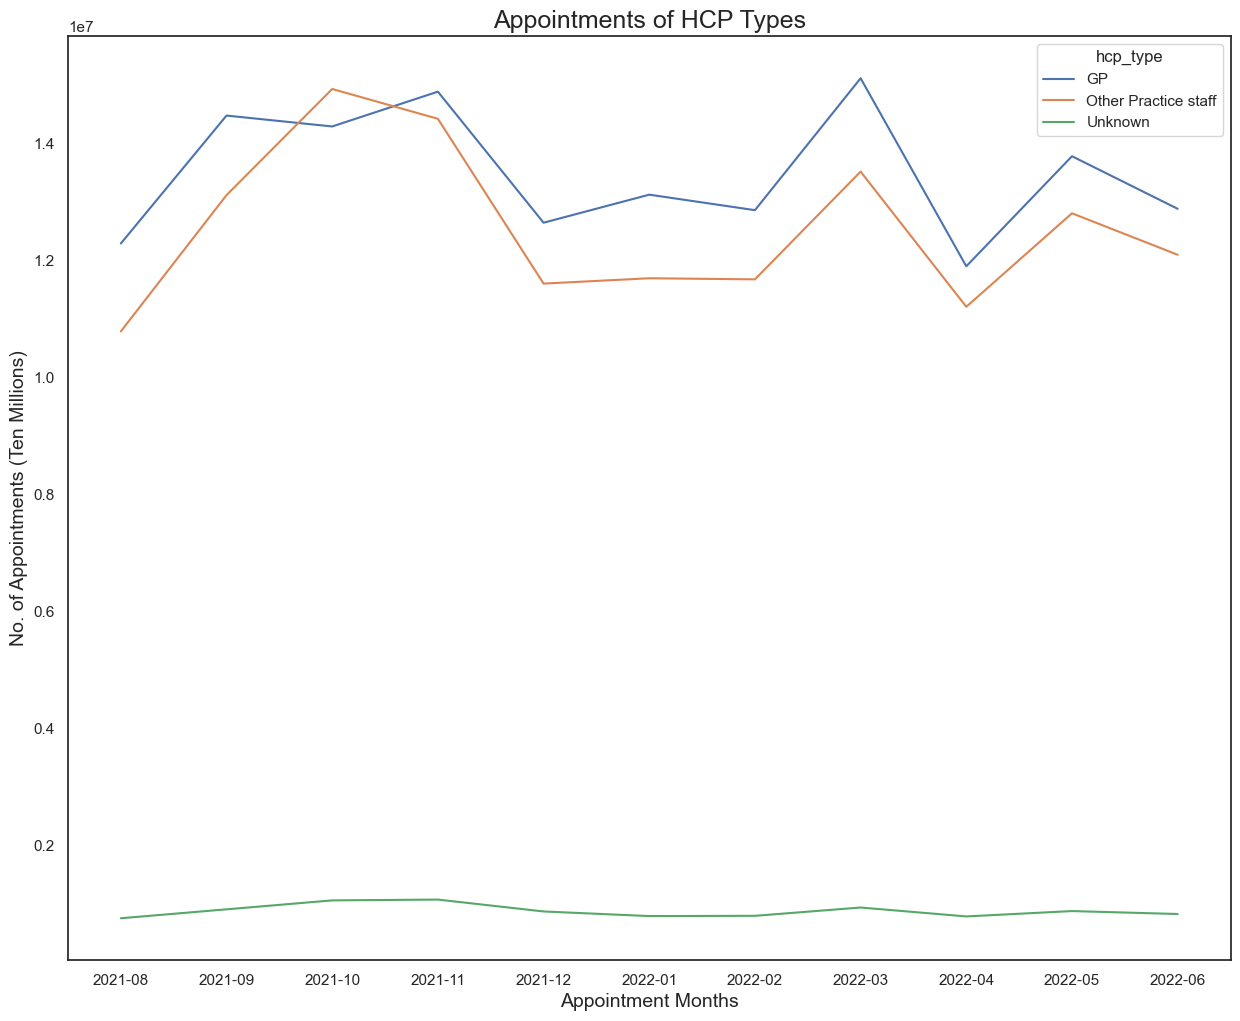

In [119]:
# Create a separate data set that can be used in future weeks. 
ar_hcp = ar_filtered.groupby(['appointment_month', 'hcp_type'])['count_of_appointments'].sum().reset_index()

# Create a lineplot to answer the question.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='hcp_type', data=ar_hcp, errorbar=None)

# Adding a title and update axis labels for clarity.
plt.title('Appointments of HCP Types', fontsize=18)
plt.xlabel('Appointment Months', fontsize=14)
plt.ylabel('No. of Appointments (Ten Millions)', fontsize=14)

**Question 3:** Are there significant changes in whether or not visits are attended?

Text(0, 0.5, ' Appointments')

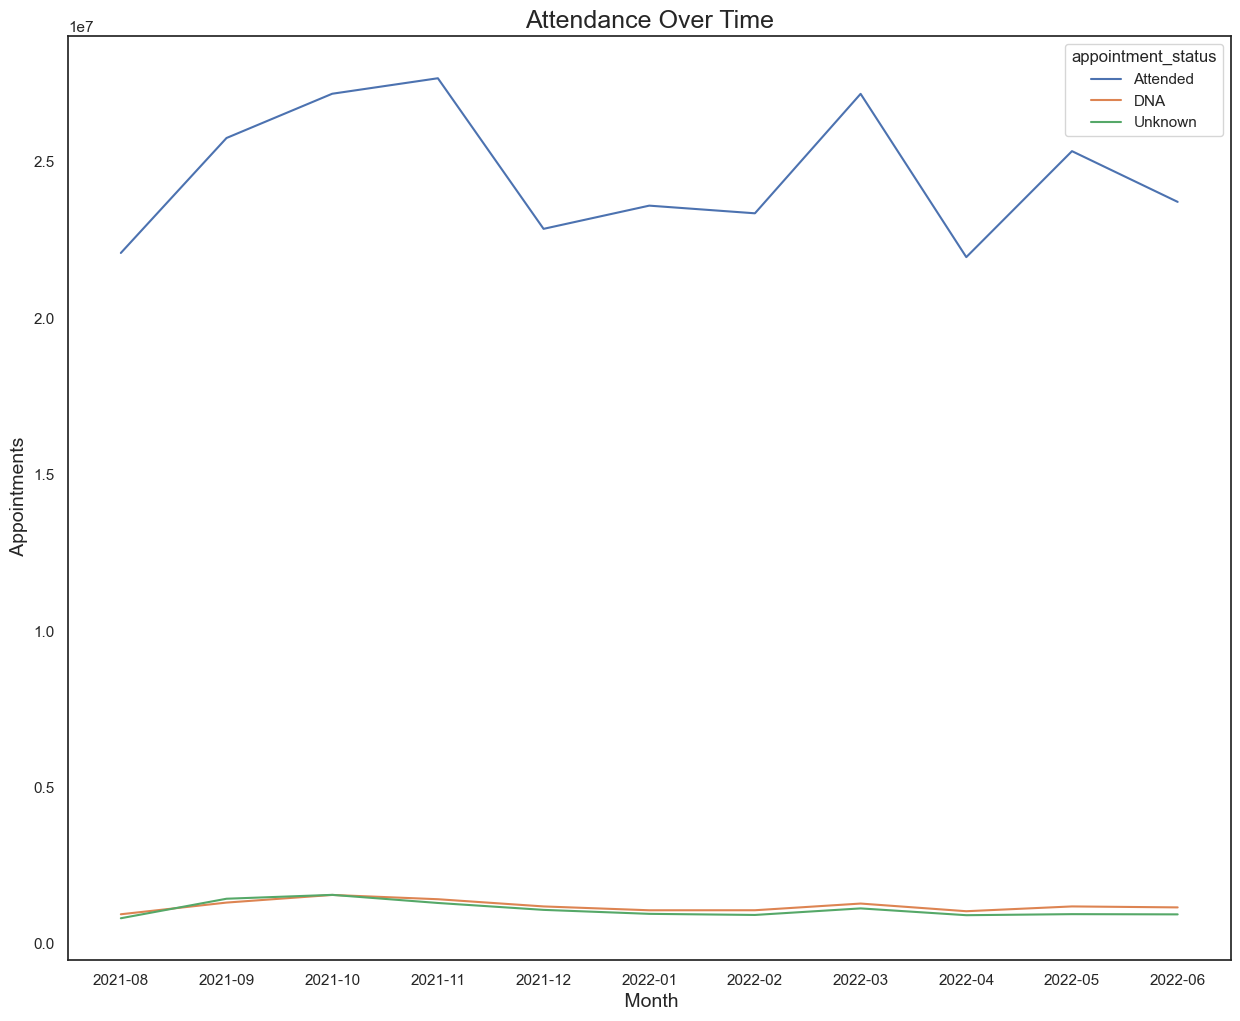

In [121]:
# Create a separate data set that can be used in future weeks. 
ar_att = ar_filtered.groupby(['appointment_month', 
                                   'appointment_status'])['count_of_appointments'].sum().reset_index()

# Create a lineplot to answer the question.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_status', data=ar_att, 
             errorbar=None)

# Adding a title and update axis labels for clarity.
plt.title('Attendance Over Time', fontsize=18)
plt.xlabel(' Month', fontsize=14)
plt.ylabel(' Appointments', fontsize=14)

**Question 4:** Are there changes in terms of appointment type and the busiest months?

Text(0, 0.5, 'Appointments')

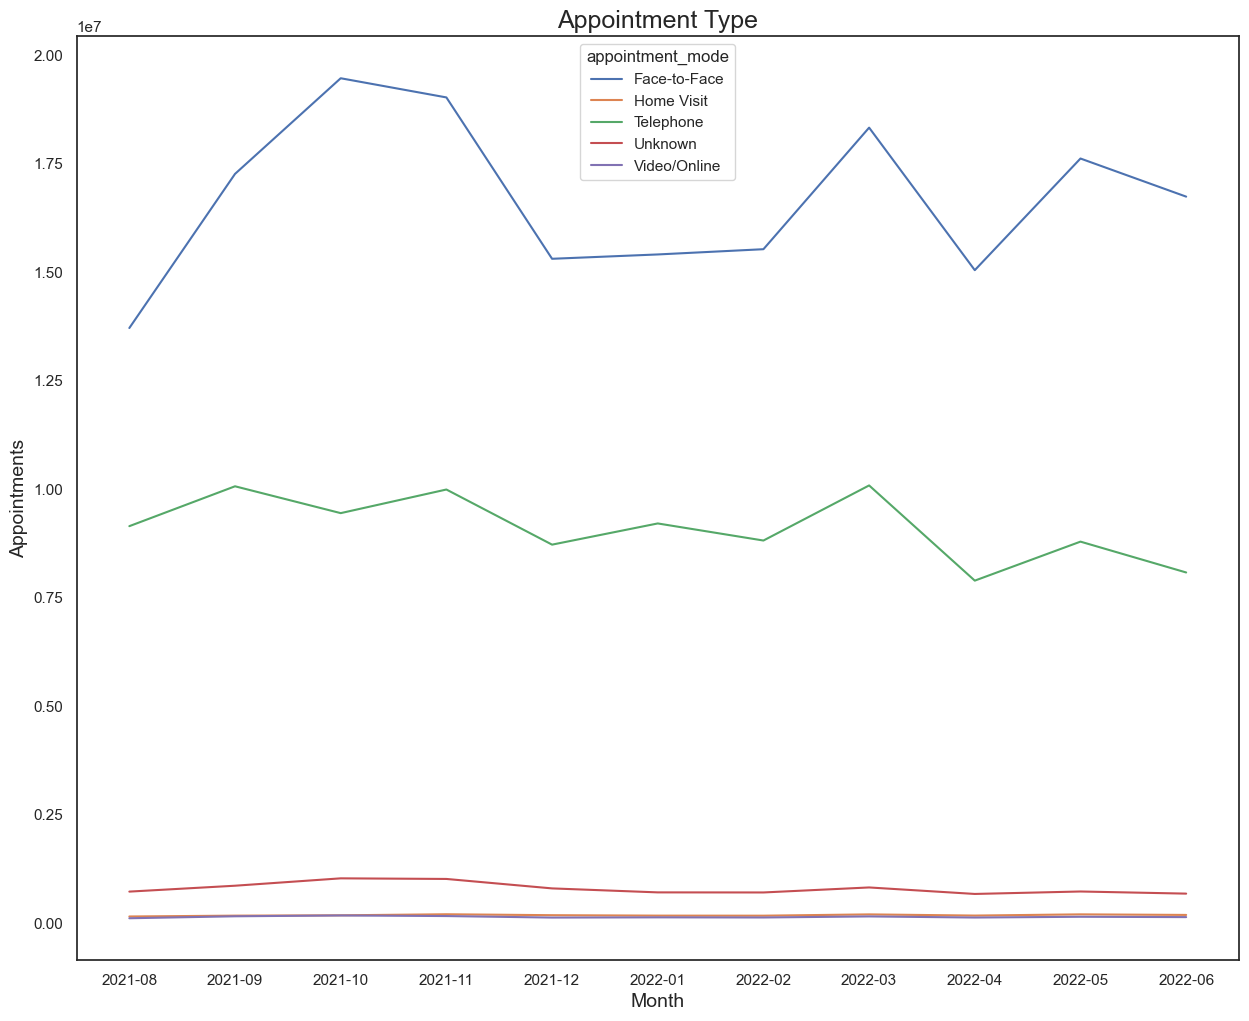

In [123]:
# Create a separate data set that can be used in future weeks. 
ar_apptype = ar_filtered.groupby(['appointment_month', 
                                      'appointment_mode'])['count_of_appointments'].sum().reset_index()

# Create a lineplot to answer the question.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_mode', data=ar_apptype, errorbar=None)

# Adding a title and update axis labels for clarity.
plt.title('Appointment Type', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel( 'Appointments', fontsize=14)

**Question 5:** Are there any trends in time between booking an appointment?

Text(0, 0.5, 'Appointments')

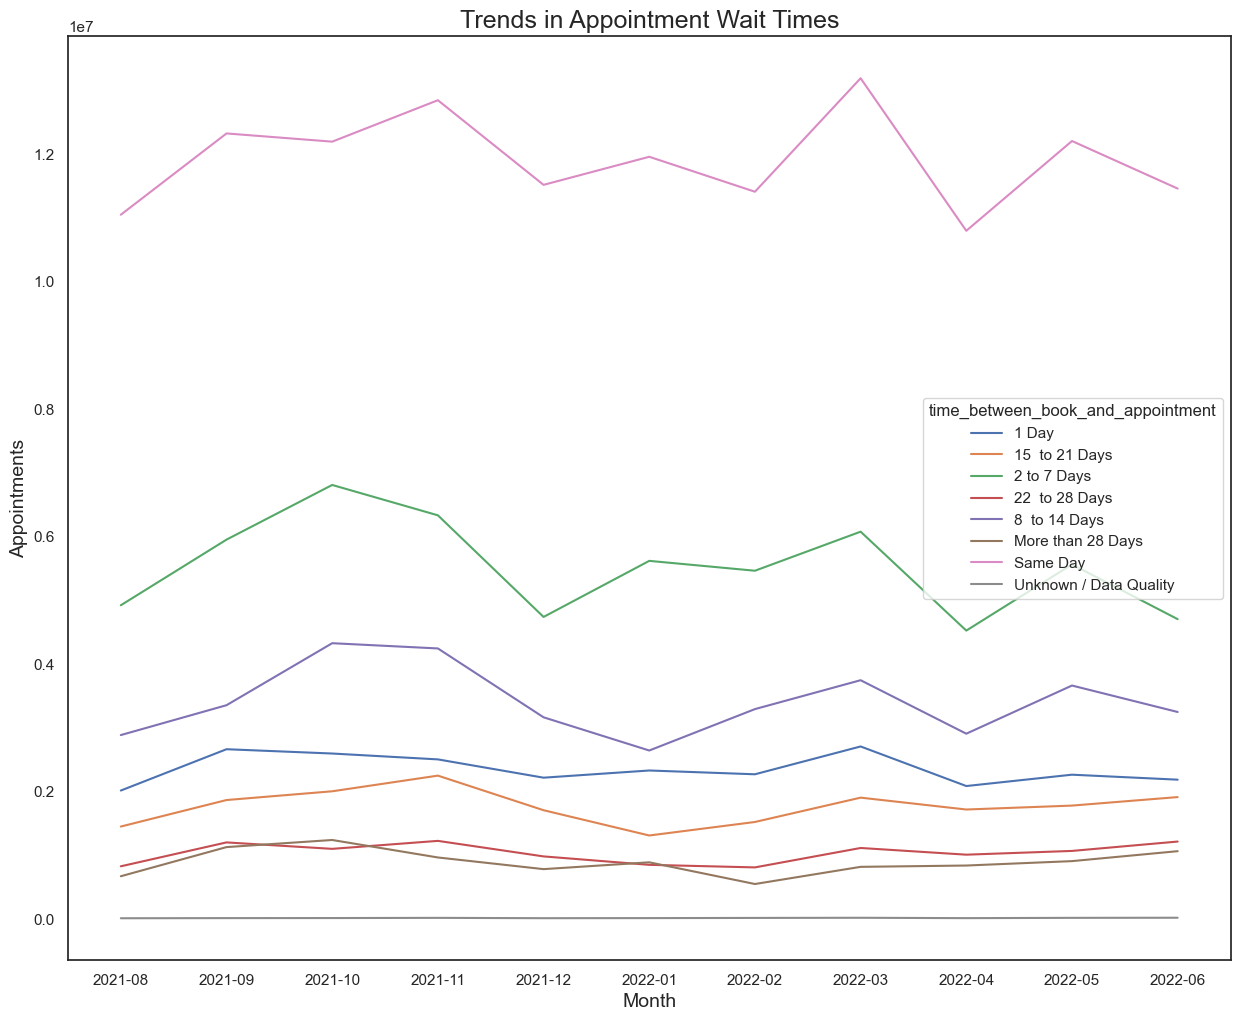

In [125]:
# Create a separate data set that can be used in future weeks. 
ar_trends = ar_filtered.groupby(['appointment_month', 
                                        'time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()

# Create a lineplot to answer the question.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='time_between_book_and_appointment', 
             data=ar_trends, errorbar=None)

# Adding a title and update axis labels for clarity.
plt.title('Trends in Appointment Wait Times', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Appointments', fontsize=14)

**Question 6:** How does the spread of service settings compare?

In [127]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08-01
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08-01
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08-01
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08-01
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08-01


In [128]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
nc_appt_month_count = nc.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# View the DataFrame.
nc_appt_month_count

,appointment_month,count_of_appointments
0,2021-08-01,23852171
1,2021-09-01,28522501
2,2021-10-01,30303834
3,2021-11-01,30405070
4,2021-12-01,25140776
5,2022-01-01,25635474
6,2022-02-01,25355260
7,2022-03-01,29595038
8,2022-04-01,23913060
9,2022-05-01,27495508


Text(0, 0.5, 'Appointments')

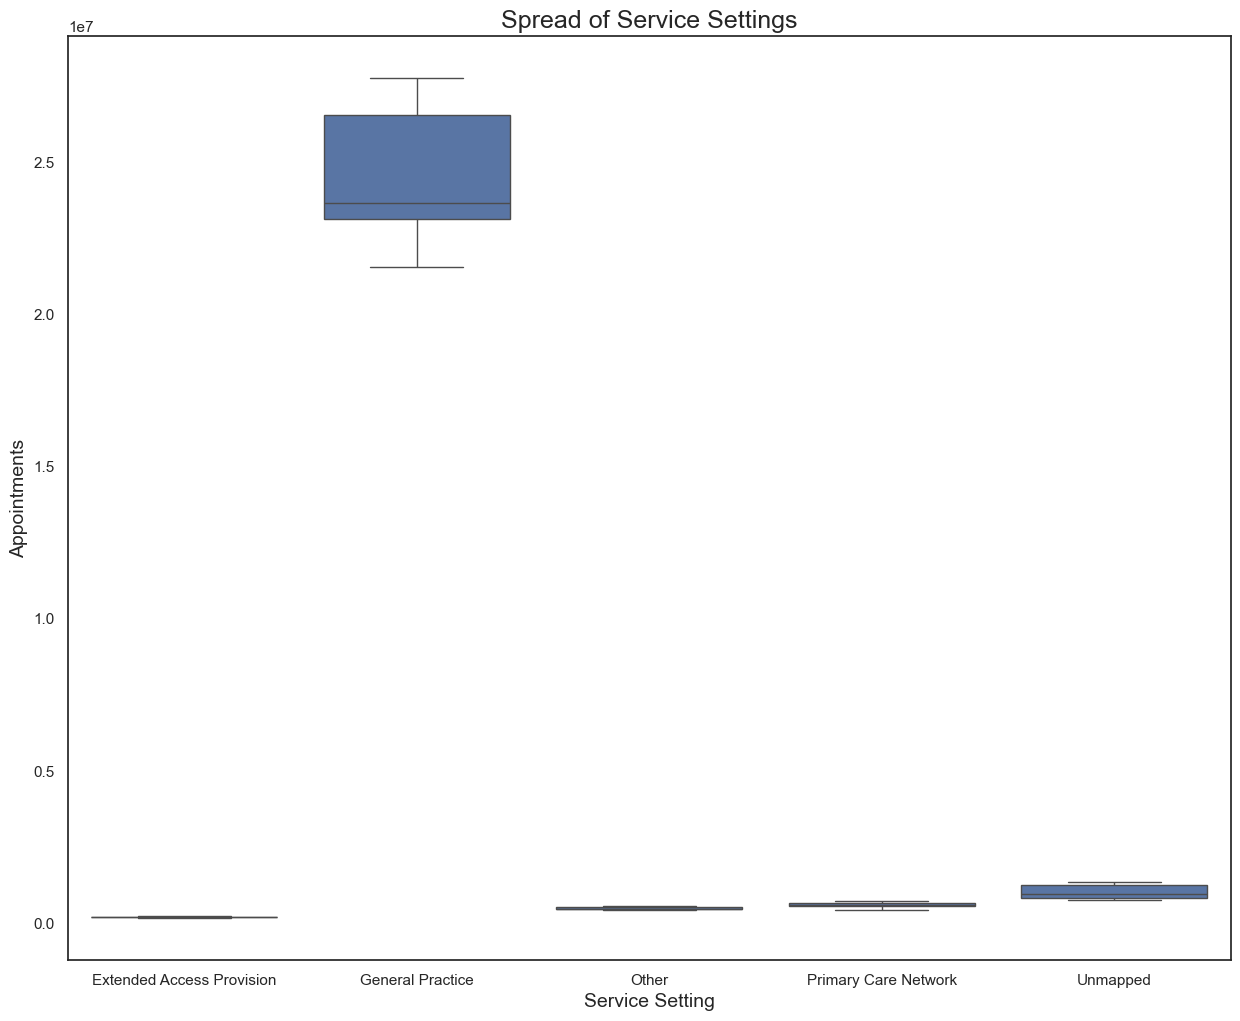

In [129]:
# Create a boxplot to investigate the spread of service settings.
nc_sscount = nc.groupby(['appointment_month','service_setting'])['count_of_appointments'].sum().reset_index()

# (Create a boxplot in Seaborn based on the new DataFrame to indicate the service settings for the number of 
# appointments.)
sns.boxplot(x='service_setting', y='count_of_appointments', data=nc_sscount)

# Adding a title and update axis labels for clarity.
plt.title('Spread of Service Settings', fontsize=18)
plt.xlabel('Service Setting', fontsize=14)
plt.ylabel('Appointments', fontsize=14)

Text(0, 0.5, 'Appointments')

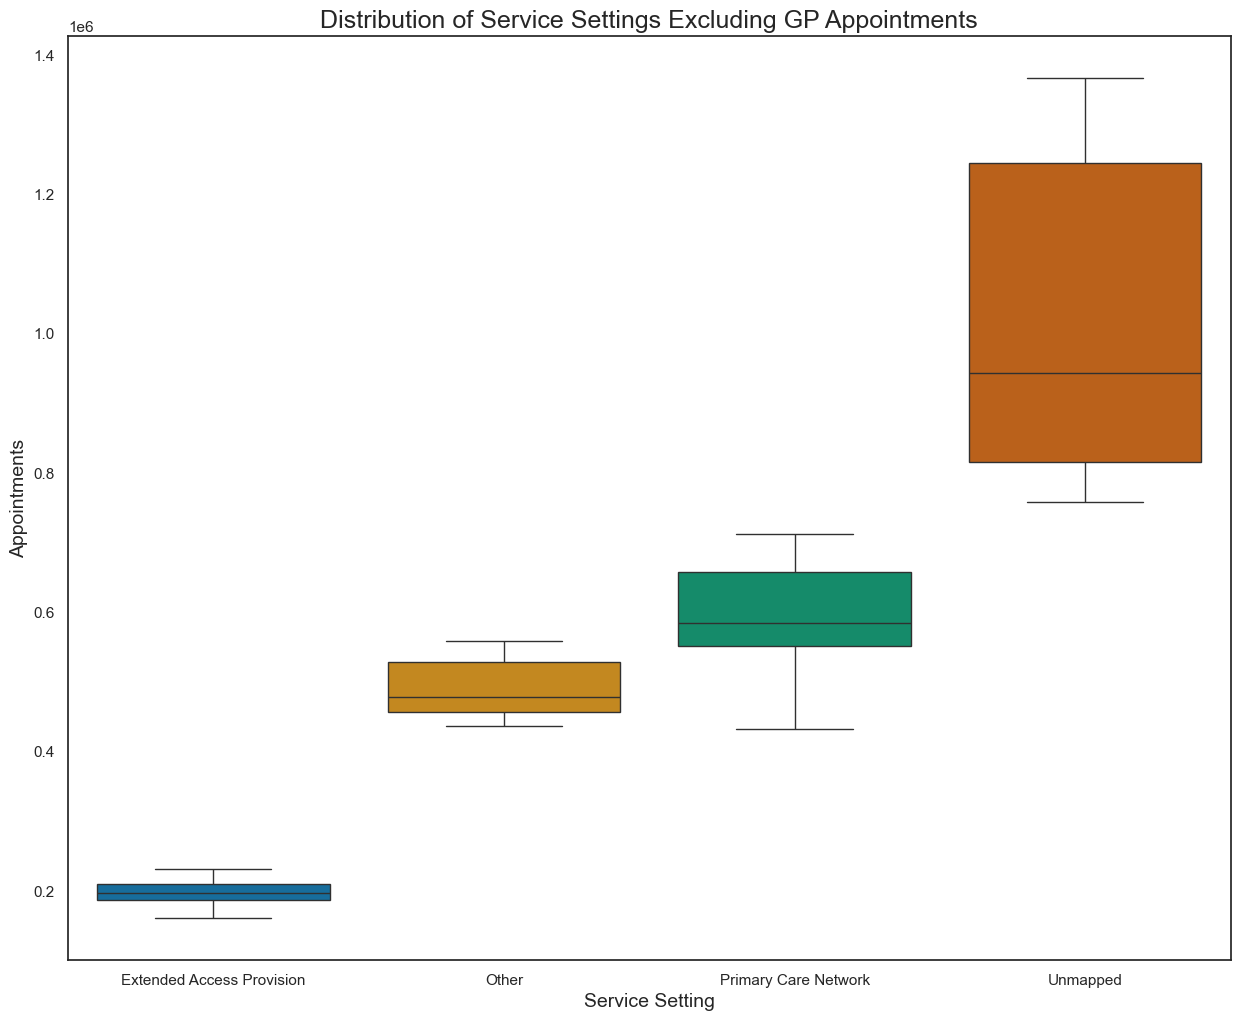

In [130]:
# Create a boxplot to investigate the service settings without GP visits.
sns.boxplot(x='service_setting', y='count_of_appointments', palette= 'colorblind', 
            data=nc_sscount[nc_sscount.service_setting != 'General Practice'])

# Adding a title and update axis labels for clarity.
plt.title('Distribution of Service Settings Excluding GP Appointments', fontsize=18)
plt.xlabel('Service Setting', fontsize=14)
plt.ylabel('Appointments', fontsize=14)

> ***Check*** that you have adequately satisfied the expectations of the current module and that you have added code comments as well as Markdown cells documenting your analytic journey and observations to satisfy the assessment criteria.